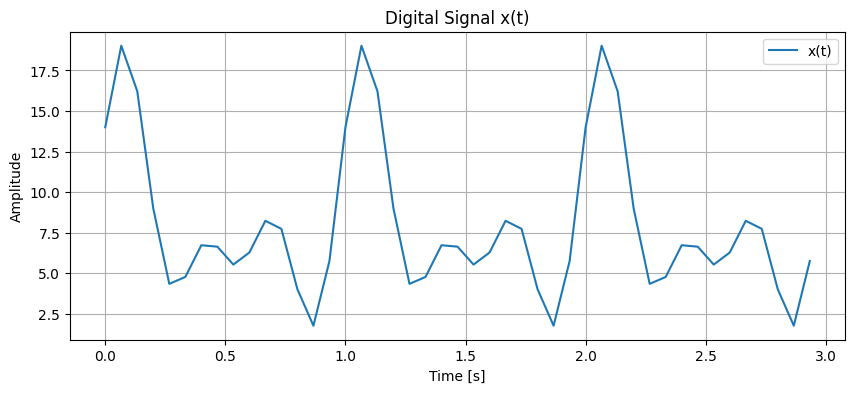

In [ ]:
# デジタル信号の生成とプロット

import numpy as np
import matplotlib.pyplot as plt

# 基本周波数1 Hz、角周波数は 2πf
# サンプリング周波数は最大周波数の5倍に設定し，測定時間は3秒.

# Parameters
f = 1  # 基本周波数 [Hz]
omega = 2 * np.pi * f  # 角周波数
T = 3  # 測定時間 [秒]
max_freq = 3 * f  # 最大周波数（cos3ωtとsin3ωtを考慮）
Fs = 5 * max_freq  # サンプリング周波数（最大周波数の5倍）
Ts = 1 / Fs  # サンプリング周期
t = np.arange(0, T, Ts)  # 時間ベクトル

# 信号生成
x_t = (8 +
       3 * np.cos(omega * t) +
       2 * np.cos(2 * omega * t) +
       np.cos(3 * omega * t) +
       2 * np.sin(omega * t) +
       4 * np.sin(2 * omega * t) +
       3 * np.sin(3 * omega * t))

# プロット
plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label="x(t)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Digital Signal x(t)")
plt.legend()
plt.grid(True)
plt.show()




# 演習1
基本周波数より，角周波数を算出した．
観測信号の各要素より，最大周波数は3となったのでそれよりFsとTsを規定した．
測定時間の3に対し，Tsの間隔でサンプリングし，プロットした．


In [16]:
import numpy as np
from scipy.integrate import quad

# 定義された信号 x(t) と g(t)
def x(t, omega):
    return 8 + 3 * np.cos(omega * t) + 2 * np.cos(2 * omega * t) + np.cos(3 * omega * t) + \
           2 * np.sin(omega * t) + 4 * np.sin(2 * omega * t) + 3 * np.sin(3 * omega * t)

# 4時刻からの信号 g(t) を定義
def g(t, omega):
    t_shifted = t + 4  # 時刻をt=4からシフト
    return 8 + 3 * np.cos(omega * t_shifted) + 2 * np.cos(2 * omega * t_shifted) + \
           np.cos(3 * omega * t_shifted) + 2 * np.sin(omega * t_shifted) + \
           4 * np.sin(2 * omega * t_shifted) + 3 * np.sin(3 * omega * t_shifted)

# フーリエ係数を計算する関数
def a0(T, omega, signal_func):
    return (1 / T) * quad(lambda t: signal_func(t, omega), 0, T)[0]

def an(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.cos(n * omega * t), 0, T)[0]

def bn(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.sin(n * omega * t), 0, T)[0]

# 基本周波数と周期
f = 1  # Hz
omega = 2 * np.pi * f
T = 1 / f  # 周期

# nの最大値をナイキスト周波数に設定（最大周波数 3Hz の 5倍）
n_max = 3  # 求めるのはa_3, b_3まで

# 1. x(t) のフーリエ係数計算
a0_x = a0(T, omega, x)
a_x_vals = [an(n, T, omega, x) for n in range(1, n_max + 1)]
b_x_vals = [bn(n, T, omega, x) for n in range(1, n_max + 1)]

# 2. g(t) のフーリエ係数計算
a0_g = a0(T, omega, g)
a_g_vals = [an(n, T, omega, g) for n in range(1, n_max + 1)]
b_g_vals = [bn(n, T, omega, g) for n in range(1, n_max + 1)]

# 結果を四捨五入して表示
def round_values(values, decimals=2):
    return [round(val, decimals) for val in values]

# 四捨五入された結果の表示
print("For x(t) (from t=0 to T):")
print(f"a0: {round(a0_x, 2)}")
print(f"a_n: {round_values(a_x_vals)}")
print(f"b_n: {round_values(b_x_vals)}")

print("\nFor g(t) (from t=4 to T+4):")
print(f"a0' (shifted): {round(a0_g, 2)}")
print(f"a_n' (shifted): {round_values(a_g_vals)}")
print(f"b_n' (shifted): {round_values(b_g_vals)}")


For x(t) (from t=0 to T):
a0: 8.0
a_n: [3.0, 2.0, 1.0]
b_n: [2.0, 4.0, 3.0]

For g(t) (from t=4 to T+4):
a0' (shifted): 8.0
a_n' (shifted): [3.0, 2.0, 1.0]
b_n' (shifted): [2.0, 4.0, 3.0]


# 演習2
先ほどの観測信号と観測信号から時間が4進んだ信号を作成し，それぞれ<2-1>のx(t)，<2-2>のg(t)で使う．
フーリエ係数を求める公式より，フーリエ係数を求める．この時，最大周波数が3なのでa_1~a_3，b_1~b_3の値までで十分である．
x(t)とg(t)の結果から位相が変化してもスペクトルの振幅は変化しないことが考察される．

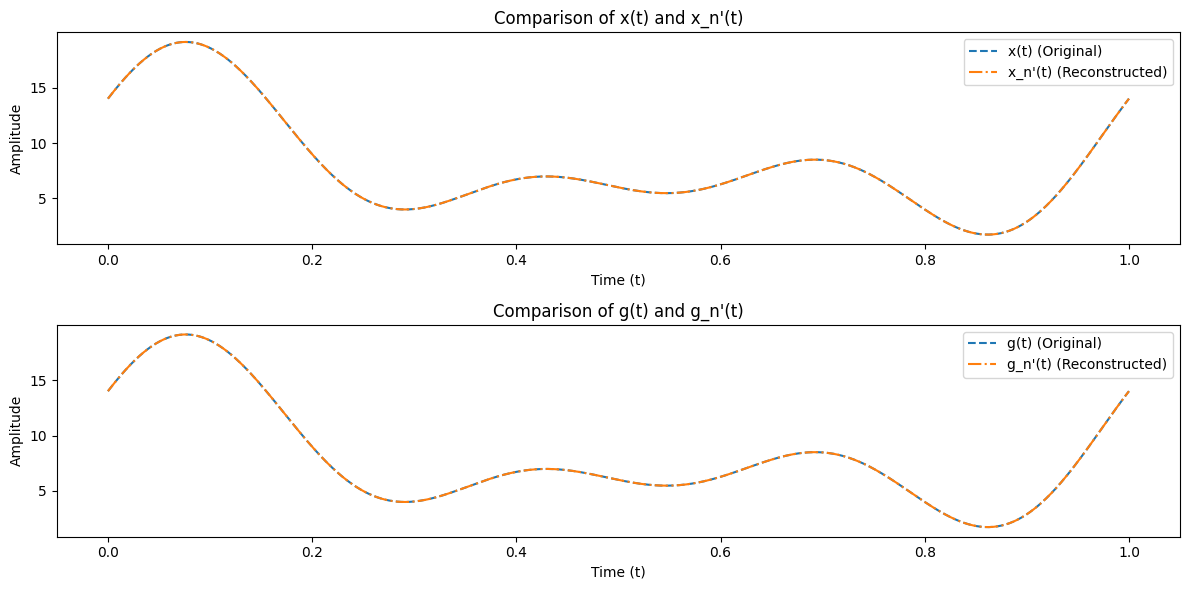

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 定義された信号 x(t) と g(t)
def x(t, omega):
    return 8 + 3 * np.cos(omega * t) + 2 * np.cos(2 * omega * t) + np.cos(3 * omega * t) + \
           2 * np.sin(omega * t) + 4 * np.sin(2 * omega * t) + 3 * np.sin(3 * omega * t)

# 4時刻からの信号 g(t) を定義
def g(t, omega):
    t_shifted = t + 4  # 時刻をt=4からシフト
    return 8 + 3 * np.cos(omega * t_shifted) + 2 * np.cos(2 * omega * t_shifted) + \
           np.cos(3 * omega * t_shifted) + 2 * np.sin(omega * t_shifted) + \
           4 * np.sin(2 * omega * t_shifted) + 3 * np.sin(3 * omega * t_shifted)

# フーリエ係数を計算する関数
def a0(T, omega, signal_func):
    return (1 / T) * quad(lambda t: signal_func(t, omega), 0, T)[0]

def an(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.cos(n * omega * t), 0, T)[0]

def bn(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.sin(n * omega * t), 0, T)[0]

# 基本周波数と周期
f = 1  # Hz
omega = 2 * np.pi * f
T = 1 / f  # 周期

# nの最大値をナイキスト周波数に設定（最大周波数 3Hz の 5倍）
n_max = 3  # 求めるのはa_3, b_3まで

# 1. x(t) のフーリエ係数計算
a0_x = a0(T, omega, x)
a_x_vals = [an(n, T, omega, x) for n in range(1, n_max + 1)]
b_x_vals = [bn(n, T, omega, x) for n in range(1, n_max + 1)]

# 2. g(t) のフーリエ係数計算
a0_g = a0(T, omega, g)
a_g_vals = [an(n, T, omega, g) for n in range(1, n_max + 1)]
b_g_vals = [bn(n, T, omega, g) for n in range(1, n_max + 1)]

# フーリエ級数により信号を復元する関数
def reconstruct_signal(a0, a_n_vals, b_n_vals, T, omega, n_max, t_vals):
    signal = np.full_like(t_vals, a0)  # まずa0を設定
    for n in range(1, n_max + 1):
        signal += a_n_vals[n-1] * np.cos(n * omega * t_vals) + b_n_vals[n-1] * np.sin(n * omega * t_vals)
    return signal

# 時間ベクトル（0からTまで）
t_vals = np.linspace(0, T, 1000)

# 信号 xn'(t) と gn'(t) を復元
xn_prime = reconstruct_signal(a0_x, a_x_vals, b_x_vals, T, omega, n_max, t_vals)
gn_prime = reconstruct_signal(a0_g, a_g_vals, b_g_vals, T, omega, n_max, t_vals)

# 元の信号 xn(t) と gn(t)
xn = x(t_vals, omega)
gn = g(t_vals, omega)

# プロット
plt.figure(figsize=(12, 6))

# xn(t) と xn'(t) の比較
plt.subplot(2, 1, 1)
plt.plot(t_vals, xn, label='x(t) (Original)', linestyle='--')
plt.plot(t_vals, xn_prime, label="x_n'(t) (Reconstructed)", linestyle='-.')
plt.title('Comparison of x(t) and x_n\'(t)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.legend()

# gn(t) と gn'(t) の比較
plt.subplot(2, 1, 2)
plt.plot(t_vals, gn, label='g(t) (Original)', linestyle='--')
plt.plot(t_vals, gn_prime, label="g_n'(t) (Reconstructed)", linestyle='-.')
plt.title('Comparison of g(t) and g_n\'(t)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# 演習3
演習2で得たフーリエ級数を使用してfor文で時間分回すことで1秒までの信号を再構成した．再構成前と再構成後の信号が合致していることから，得られたフーリエ係数が正確と考えられる．

For x(t) (from t=0 to T):
a0: 8.0
a_n: [3.0, 2.0, 1.0]
b_n: [2.0, 4.0, 3.0]

For g(t) (from t=4 to T+4):
a0' (shifted): 8.0
a_n' (shifted): [3.0, 2.0, 1.0]
b_n' (shifted): [2.0, 4.0, 3.0]


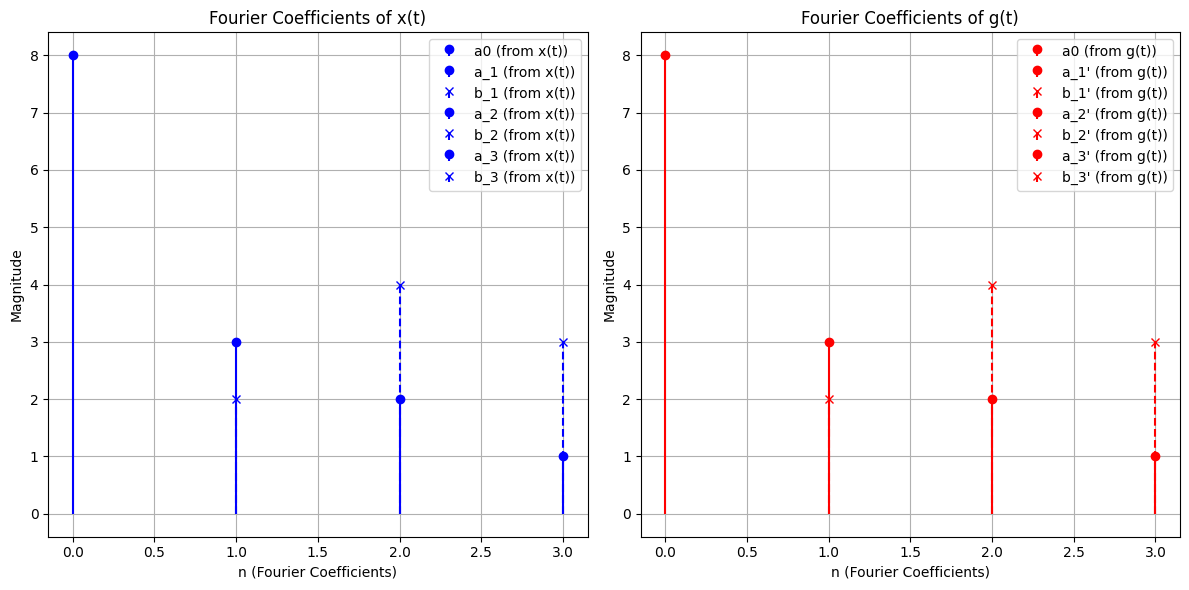

In [18]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# 定義された信号 x(t) と g(t)
def x(t, omega):
    return 8 + 3 * np.cos(omega * t) + 2 * np.cos(2 * omega * t) + np.cos(3 * omega * t) + \
           2 * np.sin(omega * t) + 4 * np.sin(2 * omega * t) + 3 * np.sin(3 * omega * t)

# 4時刻からの信号 g(t) を定義
def g(t, omega):
    t_shifted = t + 4  # 時刻をt=4からシフト
    return 8 + 3 * np.cos(omega * t_shifted) + 2 * np.cos(2 * omega * t_shifted) + \
           np.cos(3 * omega * t_shifted) + 2 * np.sin(omega * t_shifted) + \
           4 * np.sin(2 * omega * t_shifted) + 3 * np.sin(3 * omega * t_shifted)

# フーリエ係数を計算する関数
def a0(T, omega, signal_func):
    return (1 / T) * quad(lambda t: signal_func(t, omega), 0, T)[0]

def an(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.cos(n * omega * t), 0, T)[0]

def bn(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.sin(n * omega * t), 0, T)[0]

# 基本周波数と周期
f = 1  # Hz
omega = 2 * np.pi * f
T = 1 / f  # 周期

# nの最大値をナイキスト周波数に設定（最大周波数 3Hz の 5倍）
n_max = 3  # 求めるのはa_3, b_3まで

# 1. x(t) のフーリエ係数計算
a0_x = a0(T, omega, x)
a_x_vals = [an(n, T, omega, x) for n in range(1, n_max + 1)]
b_x_vals = [bn(n, T, omega, x) for n in range(1, n_max + 1)]

# 2. g(t) のフーリエ係数計算
a0_g = a0(T, omega, g)
a_g_vals = [an(n, T, omega, g) for n in range(1, n_max + 1)]
b_g_vals = [bn(n, T, omega, g) for n in range(1, n_max + 1)]

# 結果を四捨五入して表示
def round_values(values, decimals=2):
    return [round(val, decimals) for val in values]

# 四捨五入された結果の表示
print("For x(t) (from t=0 to T):")
print(f"a0: {round(a0_x, 2)}")
print(f"a_n: {round_values(a_x_vals)}")
print(f"b_n: {round_values(b_x_vals)}")

print("\nFor g(t) (from t=4 to T+4):")
print(f"a0' (shifted): {round(a0_g, 2)}")
print(f"a_n' (shifted): {round_values(a_g_vals)}")
print(f"b_n' (shifted): {round_values(b_g_vals)}")

# プロット

# Xn のプロット (x(t) のフーリエ係数)
plt.figure(figsize=(12, 6))

# x(t) のフーリエ係数をプロット
plt.subplot(1, 2, 1)
plt.stem([0], [a0_x], basefmt=" ", label="a0 (from x(t))", linefmt='b-', markerfmt='bo')
for n in range(1, n_max + 1):
    plt.stem([n], [a_x_vals[n-1]], basefmt=" ", label=f"a_{n} (from x(t))", linefmt='b-', markerfmt='bo')
    plt.stem([n], [b_x_vals[n-1]], basefmt=" ", label=f"b_{n} (from x(t))", linefmt='b--', markerfmt='bx')
plt.title('Fourier Coefficients of x(t)')
plt.xlabel('n (Fourier Coefficients)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# g(t) のフーリエ係数をプロット
plt.subplot(1, 2, 2)
plt.stem([0], [a0_g], basefmt=" ", label="a0 (from g(t))", linefmt='r-', markerfmt='ro')
for n in range(1, n_max + 1):
    plt.stem([n], [a_g_vals[n-1]], basefmt=" ", label=f"a_{n}' (from g(t))", linefmt='r-', markerfmt='ro')
    plt.stem([n], [b_g_vals[n-1]], basefmt=" ", label=f"b_{n}' (from g(t))", linefmt='r--', markerfmt='rx')
plt.title('Fourier Coefficients of g(t)')
plt.xlabel('n (Fourier Coefficients)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 演習4
計算したフーリエ係数をnの値ごとにプロットし，成分ごとに比較した．
x(t)とg(t)に同様の係数が見られることが確認できるため，信号の波形が同等であると考えられる．

In [ ]:
import numpy as np
from scipy.integrate import quad

# 定義された信号 x(t) と g(t)
def x(t, omega):
    return 8 + 3 * np.cos(omega * t) + 2 * np.cos(2 * omega * t) + np.cos(3 * omega * t) + \
           2 * np.sin(omega * t) + 4 * np.sin(2 * omega * t) + 3 * np.sin(3 * omega * t)

# 4時刻からの信号 g(t) を定義
def g(t, omega):
    t_shifted = t + 4  # 時刻をt=4からシフト
    return 8 + 3 * np.cos(omega * t_shifted) + 2 * np.cos(2 * omega * t_shifted) + \
           np.cos(3 * omega * t_shifted) + 2 * np.sin(omega * t_shifted) + \
           4 * np.sin(2 * omega * t_shifted) + 3 * np.sin(3 * omega * t_shifted)

# フーリエ係数を計算する関数
def a0(T, omega, signal_func):
    return (1 / T) * quad(lambda t: signal_func(t, omega), 0, T)[0]

def an(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.cos(n * omega * t), 0, T)[0]

def bn(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.sin(n * omega * t), 0, T)[0]

# 基本周波数と周期
f = 1  # Hz
omega = 2 * np.pi * f
T = 1 / f  # 周期

# nの最大値をナイキスト周波数に設定（最大周波数 3Hz の 5倍）
n_max = 3  # 求めるのはa_3, b_3まで

# 1. x(t) のフーリエ係数計算
a0_x = a0(T, omega, x)
a_x_vals = [an(n, T, omega, x) for n in range(1, n_max + 1)]
b_x_vals = [bn(n, T, omega, x) for n in range(1, n_max + 1)]

# 2. g(t) のフーリエ係数計算
a0_g = a0(T, omega, g)
a_g_vals = [an(n, T, omega, g) for n in range(1, n_max + 1)]
b_g_vals = [bn(n, T, omega, g) for n in range(1, n_max + 1)]

# スペクトル X(n) と G(n) の計算
def calculate_spectrum(a_vals, b_vals):
    return [np.sqrt(a**2 + b**2) for a, b in zip(a_vals, b_vals)]

# X(n) と G(n) の計算
X_vals = [np.sqrt(a**2 + b**2) for a, b in zip(a_x_vals, b_x_vals)]
G_vals = [np.sqrt(a**2 + b**2) for a, b in zip(a_g_vals, b_g_vals)]

# 結果を四捨五入して表示
def round_values(values, decimals=2):
    return [round(val, decimals) for val in values]

# 結果の表示
print("For x(t) (from t=0 to T):")
print(f"a0: {round(a0_x, 2)}")
print(f"a_n: {round_values(a_x_vals)}")
print(f"b_n: {round_values(b_x_vals)}")
print(f"X(n): {round_values(X_vals)}")

print("\nFor g(t) (from t=4 to T+4):")
print(f"a0' (shifted): {round(a0_g, 2)}")
print(f"a_n' (shifted): {round_values(a_g_vals)}")
print(f"b_n' (shifted): {round_values(b_g_vals)}")
print(f"G(n): {round_values(G_vals)}")


For x(t) (from t=0 to T):
a0: 8.0
a_n: [3.0, 2.0, 1.0]
b_n: [2.0, 4.0, 3.0]
X(n): [np.float64(3.61), np.float64(4.47), np.float64(3.16)]

For g(t) (from t=4 to T+4):
a0' (shifted): 8.0
a_n' (shifted): [3.0, 2.0, 1.0]
b_n' (shifted): [2.0, 4.0, 3.0]
G(n): [np.float64(3.61), np.float64(4.47), np.float64(3.16)]


#　演習5
x(t)とg(t)からa_nとb_nの平方二乗根を取ることでスペクトルX(n),G(n)を算出した．
X(n)とG(n)より，シフトの前後で値が変化しないことが確認された．これより，シフトが信号のスペクトル振幅に影響を与えることはないと考えられる．

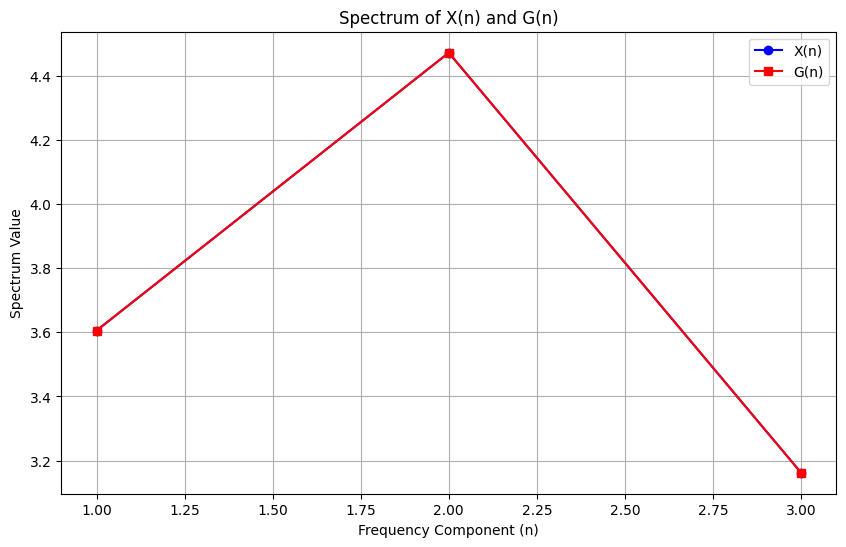

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# 定義された信号 x(t) と g(t)
def x(t, omega):
    return 8 + 3 * np.cos(omega * t) + 2 * np.cos(2 * omega * t) + np.cos(3 * omega * t) + \
           2 * np.sin(omega * t) + 4 * np.sin(2 * omega * t) + 3 * np.sin(3 * omega * t)

def g(t, omega):
    t_shifted = t + 4  # 時刻をt=4からシフト
    return 8 + 3 * np.cos(omega * t_shifted) + 2 * np.cos(2 * omega * t_shifted) + \
           np.cos(3 * omega * t_shifted) + 2 * np.sin(omega * t_shifted) + \
           4 * np.sin(2 * omega * t_shifted) + 3 * np.sin(3 * omega * t_shifted)

# フーリエ係数を計算する関数
def a0(T, omega, signal_func):
    return (1 / T) * quad(lambda t: signal_func(t, omega), 0, T)[0]

def an(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.cos(n * omega * t), 0, T)[0]

def bn(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.sin(n * omega * t), 0, T)[0]

# 基本周波数と周期
f = 1  # Hz
omega = 2 * np.pi * f
T = 1 / f  # 周期

# nの最大値をナイキスト周波数に設定（最大周波数 3Hz の 5倍）
n_max = 3  # 求めるのはa_3, b_3まで

# 1. x(t) のフーリエ係数計算
a0_x = a0(T, omega, x)
a_x_vals = [an(n, T, omega, x) for n in range(1, n_max + 1)]
b_x_vals = [bn(n, T, omega, x) for n in range(1, n_max + 1)]

# 2. g(t) のフーリエ係数計算
a0_g = a0(T, omega, g)
a_g_vals = [an(n, T, omega, g) for n in range(1, n_max + 1)]
b_g_vals = [bn(n, T, omega, g) for n in range(1, n_max + 1)]

# スペクトル X(n) と G(n) の計算
X_vals = [np.sqrt(a**2 + b**2) for a, b in zip(a_x_vals, b_x_vals)]
G_vals = [np.sqrt(a**2 + b**2) for a, b in zip(a_g_vals, b_g_vals)]

# グラフのプロット
n_values = range(1, n_max + 1)

plt.figure(figsize=(10, 6))
plt.plot(n_values, X_vals, marker='o', label='X(n)', color='blue')
plt.plot(n_values, G_vals, marker='s', label='G(n)', color='red')
plt.xlabel('Frequency Component (n)')
plt.ylabel('Spectrum Value')
plt.title('Spectrum of X(n) and G(n)')
plt.legend()
plt.grid(True)
plt.show()


# 演習6
演習5で計算したスペクトルをx軸を周波数成分n，y軸をスペクトル振幅として折れ線グラフとしてプロットした．
スペクトルの形状が一致していることから時間シフトは位相のみを変化させ，振幅に影響がないことを表していることから同じ周波数成分情報を持っていると考えられる．

W^0 = (1+0j)
W^1 = (0.7071067811865476-0.7071067811865475j)
W^2 = (1.7938038903913487e-16-1j)
W^3 = (-0.7071067811865474-0.7071067811865477j)
W^4 = (-1-3.5876077807826975e-16j)
W^5 = (-0.7071067811865478+0.7071067811865472j)
W^6 = (-5.381411671174046e-16+1j)
W^7 = (0.7071067811865471+0.7071067811865479j)
W^8 = (1+7.175215561565395e-16j)
W^9 = (0.7071067811865481-0.7071067811865469j)
W^10 = (8.969019451956743e-16-1j)
W^11 = (-0.7071067811865468-0.7071067811865482j)
W^12 = (-1-1.0762823342348092e-15j)
W^13 = (-0.7071067811865483+0.7071067811865467j)
W^14 = (-1.2556627232739442e-15+1j)
W^15 = (0.7071067811865466+0.7071067811865485j)
W^16 = (1+1.435043112313079e-15j)
W^17 = (0.7071067811865486-0.7071067811865465j)
W^18 = (1.6144235013522138e-15-1j)
W^19 = (-0.7071067811865464-0.7071067811865487j)
W^20 = (-1-1.7938038903913485e-15j)
W^21 = (-0.7071067811865488+0.7071067811865462j)
W^22 = (-1.9731842794304837e-15+1j)
W^23 = (0.7071067811865461+0.7071067811865489j)
W^24 = (1+2.152564668469618

/Users/adachiharuto/prog/S_P/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34394 (\N{CJK UNIFIED IDEOGRAPH-865A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/adachiharuto/prog/S_P/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/adachiharuto/prog/S_P/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/adachiharuto/prog/S_P/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35079 (\N{CJK UNIFIED IDEOGRAPH-8907}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/adachiharuto/prog/S_P/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:15

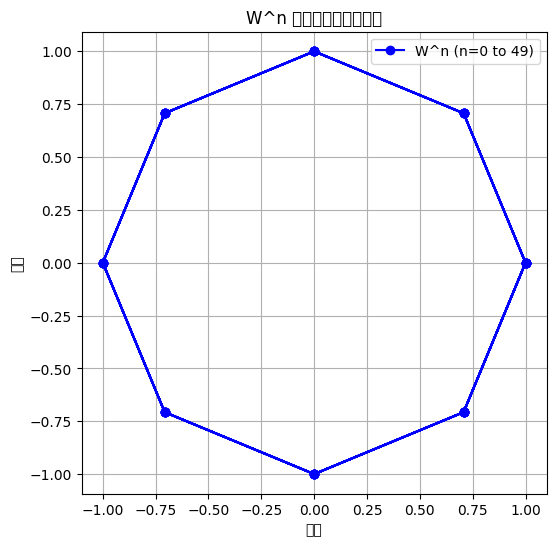

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Wを定義
W = np.exp(-1j * 2 * np.pi / 8)

# W^n を n = 0 から 49 まで計算
powers = [W**n for n in range(50)]

# 結果を表示
for n, w in enumerate(powers):
    print(f"W^{n} = {w}")

# W^n の実部と虚部をプロット（任意）
real_parts = [np.real(w) for w in powers]
imag_parts = [np.imag(w) for w in powers]

plt.figure(figsize=(6, 6))
plt.plot(real_parts, imag_parts, 'bo-', label="W^n (n=0 to 49)")
plt.xlabel('実部')
plt.ylabel('虚部')
plt.title('W^n の複素平面上の位置')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


W^0 = cos(0 * (-π/4)) + j sin(0 * (-π/4)) = (1+0j)
W^1 = cos(1 * (-π/4)) + j sin(1 * (-π/4)) = (0.7071067811865476-0.7071067811865475j)
W^2 = cos(2 * (-π/4)) + j sin(2 * (-π/4)) = (6.123233995736766e-17-1j)
W^3 = cos(3 * (-π/4)) + j sin(3 * (-π/4)) = (-0.7071067811865475-0.7071067811865476j)
W^4 = cos(4 * (-π/4)) + j sin(4 * (-π/4)) = (-1-1.2246467991473532e-16j)
W^5 = cos(5 * (-π/4)) + j sin(5 * (-π/4)) = (-0.7071067811865477+0.7071067811865475j)
W^6 = cos(6 * (-π/4)) + j sin(6 * (-π/4)) = (-1.8369701987210297e-16+1j)
W^7 = cos(7 * (-π/4)) + j sin(7 * (-π/4)) = (0.7071067811865474+0.7071067811865477j)
W^8 = cos(8 * (-π/4)) + j sin(8 * (-π/4)) = (1+2.4492935982947064e-16j)
W^9 = cos(9 * (-π/4)) + j sin(9 * (-π/4)) = (0.7071067811865477-0.7071067811865474j)
W^10 = cos(10 * (-π/4)) + j sin(10 * (-π/4)) = (3.061616997868383e-16-1j)
W^11 = cos(11 * (-π/4)) + j sin(11 * (-π/4)) = (-0.7071067811865467-0.7071067811865485j)
W^12 = cos(12 * (-π/4)) + j sin(12 * (-π/4)) = (-1-3.6739403974420594e

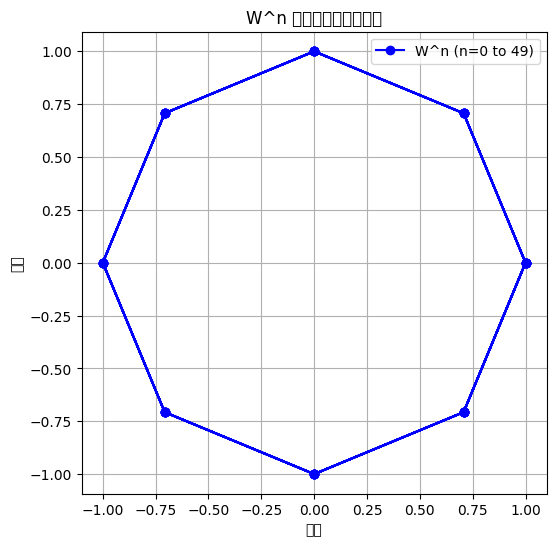

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Wの角度
theta = -np.pi / 4

# W^n を cosとsinで表現
powers = [np.cos(n * theta) + 1j * np.sin(n * theta) for n in range(50)]

# 結果を表示
for n, w in enumerate(powers):
    print(f"W^{n} = cos({n} * (-π/4)) + j sin({n} * (-π/4)) = {w}")

# W^n の実部と虚部をプロット（任意）
real_parts = [np.real(w) for w in powers]
imag_parts = [np.imag(w) for w in powers]

plt.figure(figsize=(6, 6))
plt.plot(real_parts, imag_parts, 'bo-', label="W^n (n=0 to 49)")
plt.xlabel('実部')
plt.ylabel('虚部')
plt.title('W^n の複素平面上の位置')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
